In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
data = pd.read_csv(r'../data/merged_data/preprocessed_data.csv')

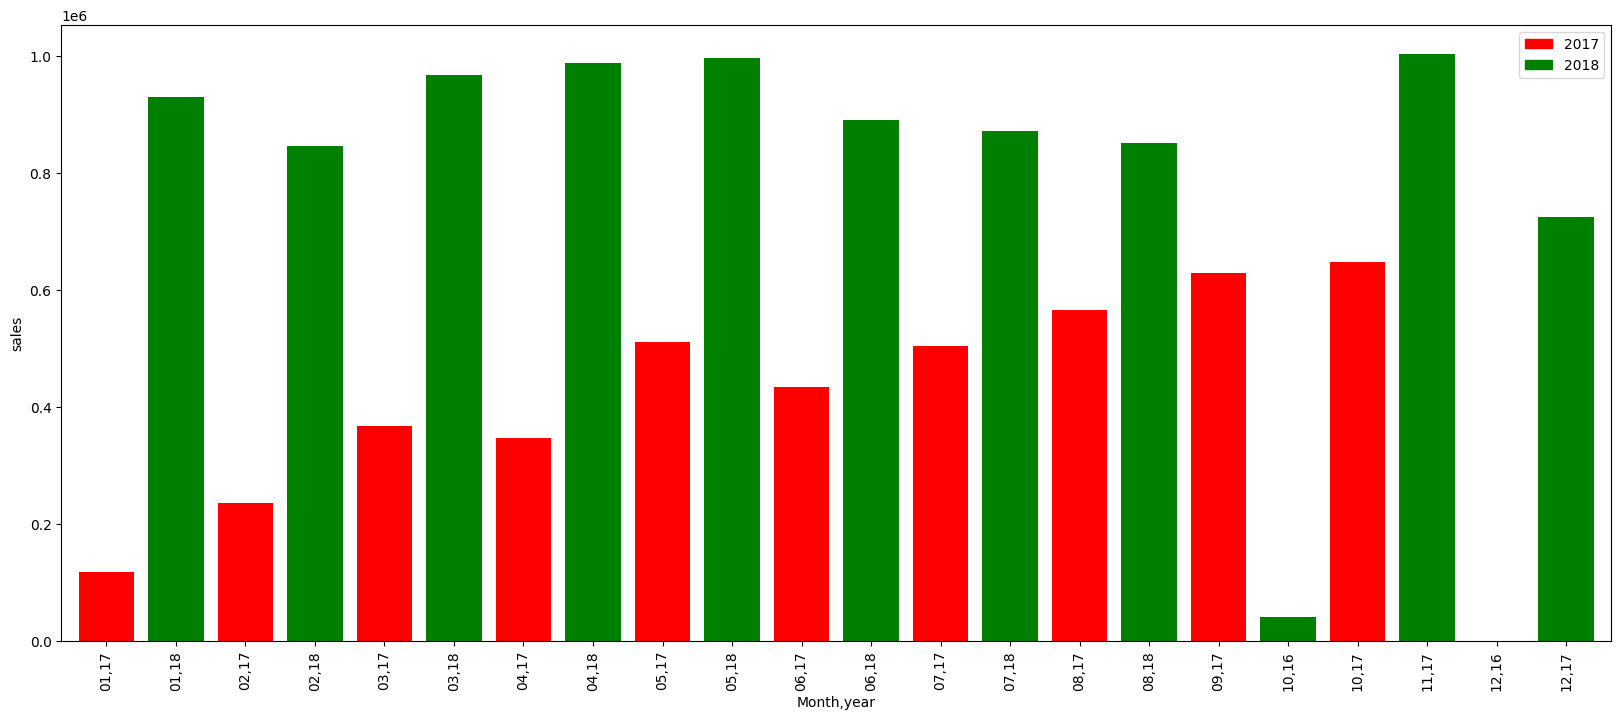

In [3]:
#understanding the growth of Olist as an ecommerce company from the range of data given to us

data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
monthly_sales_data = data.groupby(data['order_purchase_timestamp'].dt.strftime('%m,%y'))['price'].sum().plot(kind='bar',figsize = (20,8),color=['r','g'],width=0.8)
plt.ylabel('sales')

red_patch = mpatches.Patch(color='red', label='2017')
green_patch = mpatches.Patch(color='green', label='2018')
plt.legend(handles=[red_patch,green_patch])
plt.xlabel('Month,year')
plt.show()

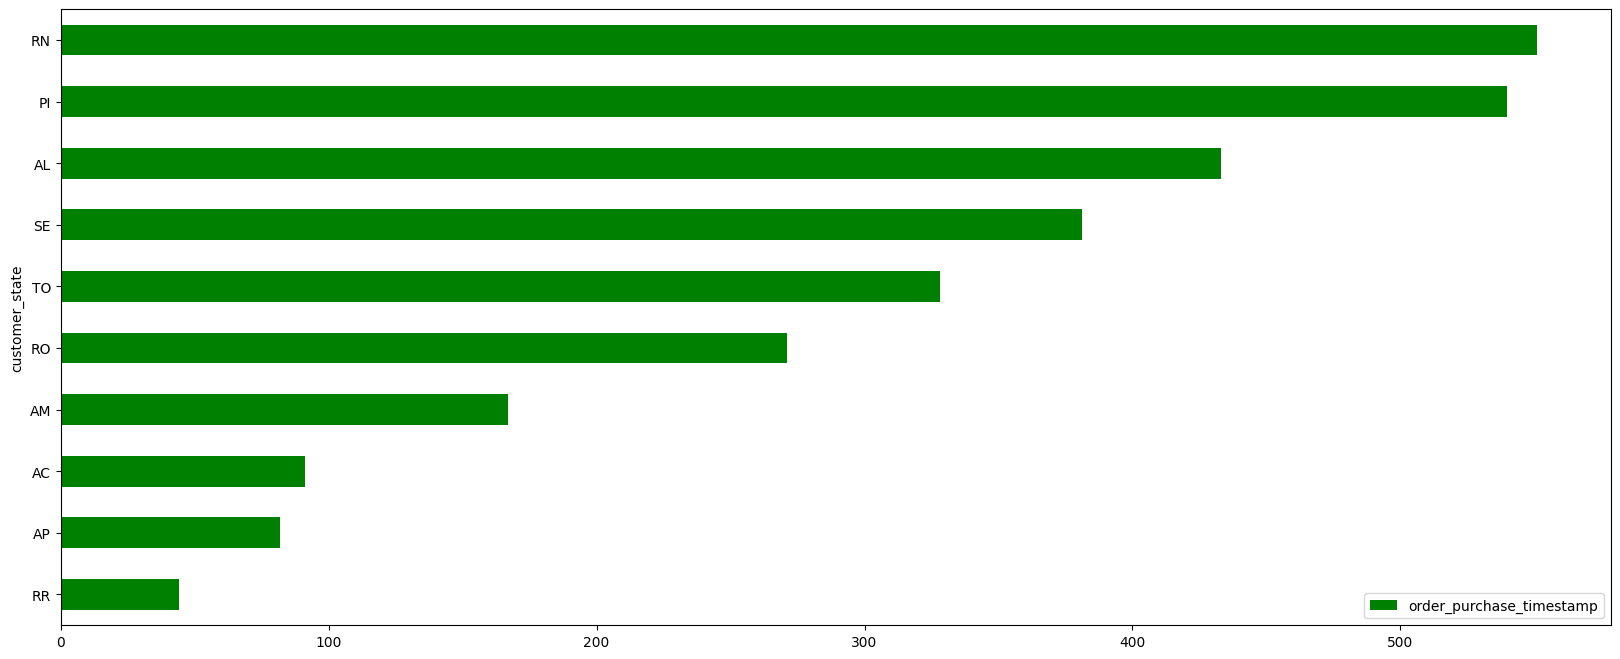

In [4]:
#top 10 states as per number of orders
data.groupby(data['customer_state'])['order_purchase_timestamp'].count().sort_values()[:10].plot(kind='barh',figsize=(20,8),color='green')
plt.legend()
plt.show()

In [5]:
print('Total unique category are ',data.product_category_name.unique().shape[0])

Total unique category are  71


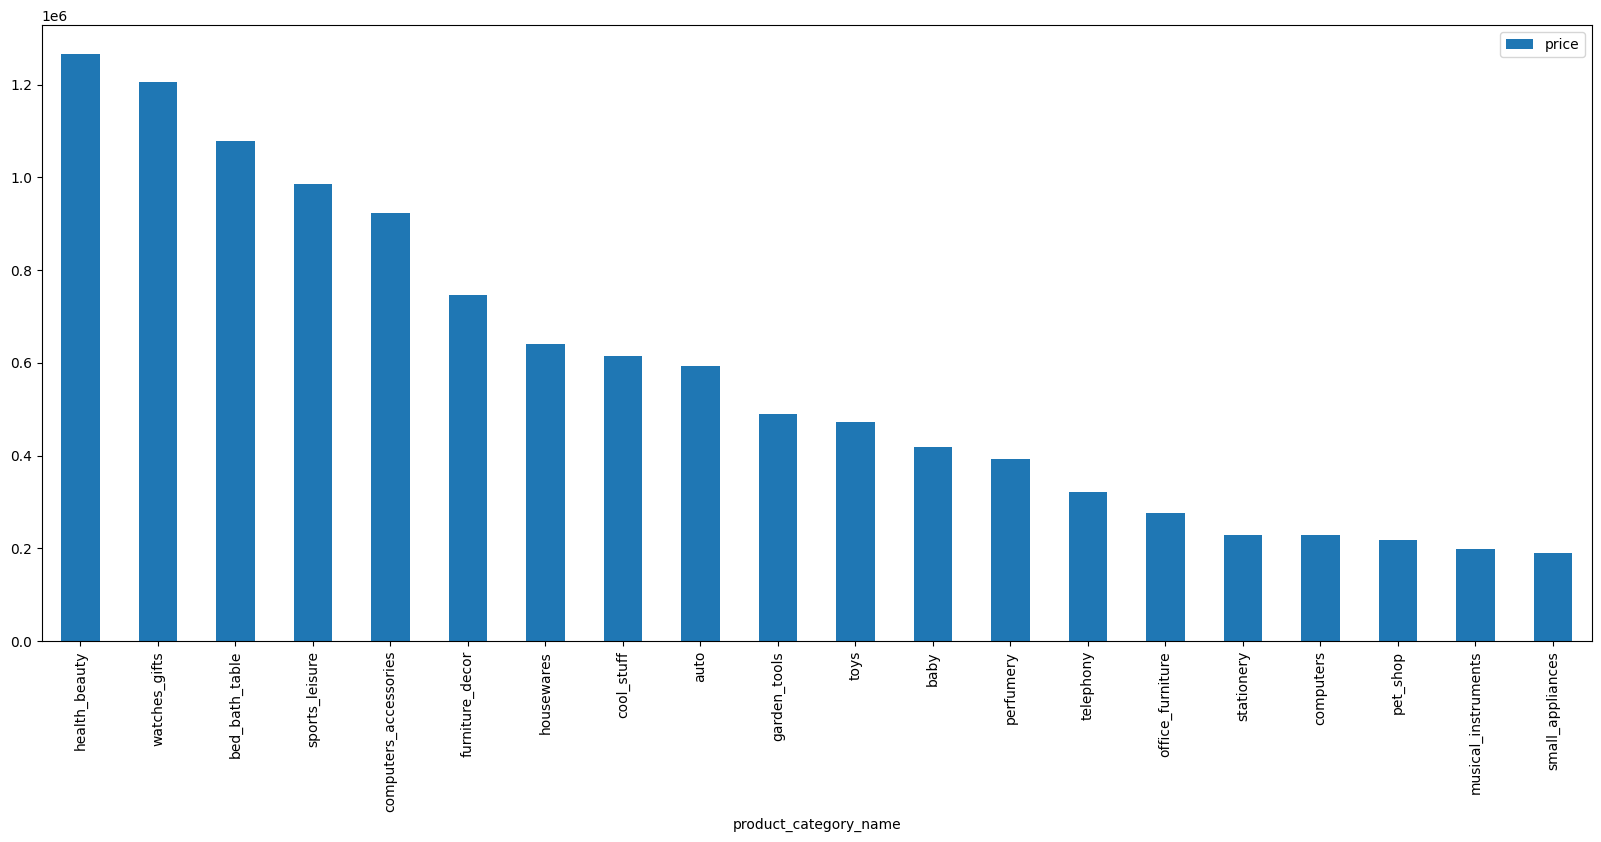

In [6]:
#category wise sales with their rating(top 20)
data.groupby(data['product_category_name'])['price'].sum().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(20,8))
plt.legend()
plt.show()

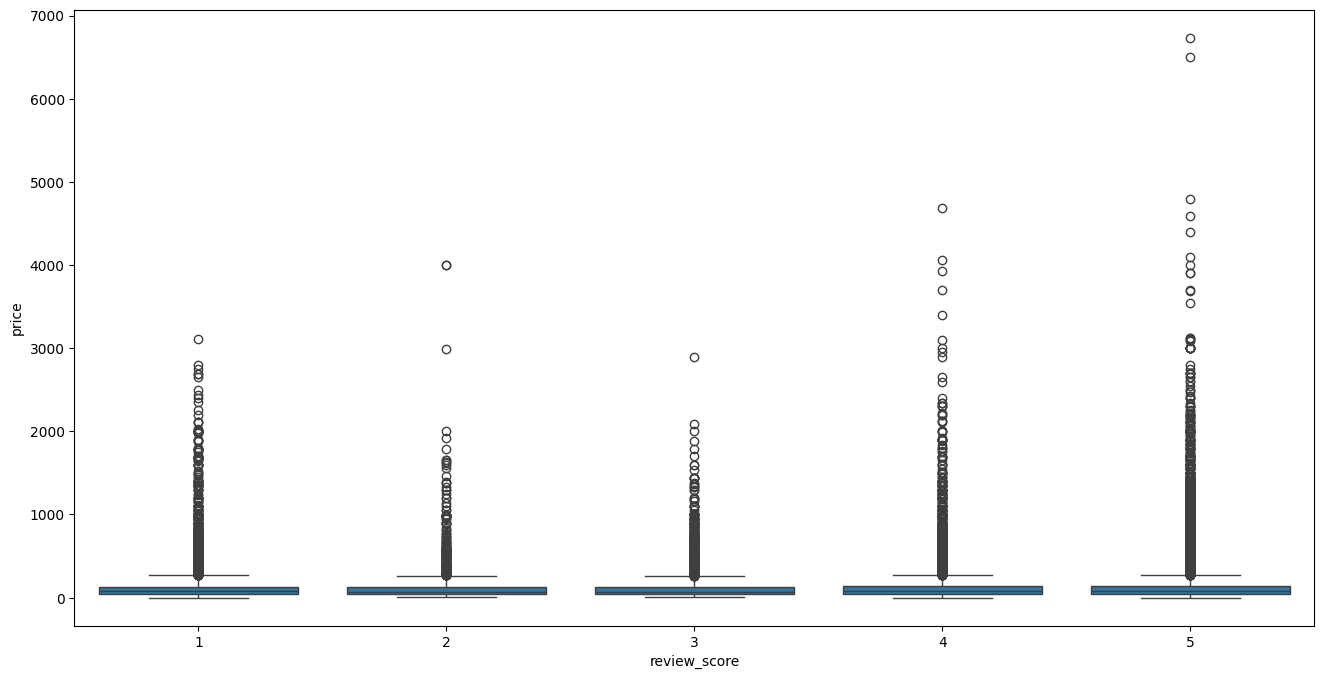

In [7]:
#Box plot for price with review score
plt.figure(figsize= (16,8))
sns.boxplot(x='review_score',y='price', data=data)
plt.show()

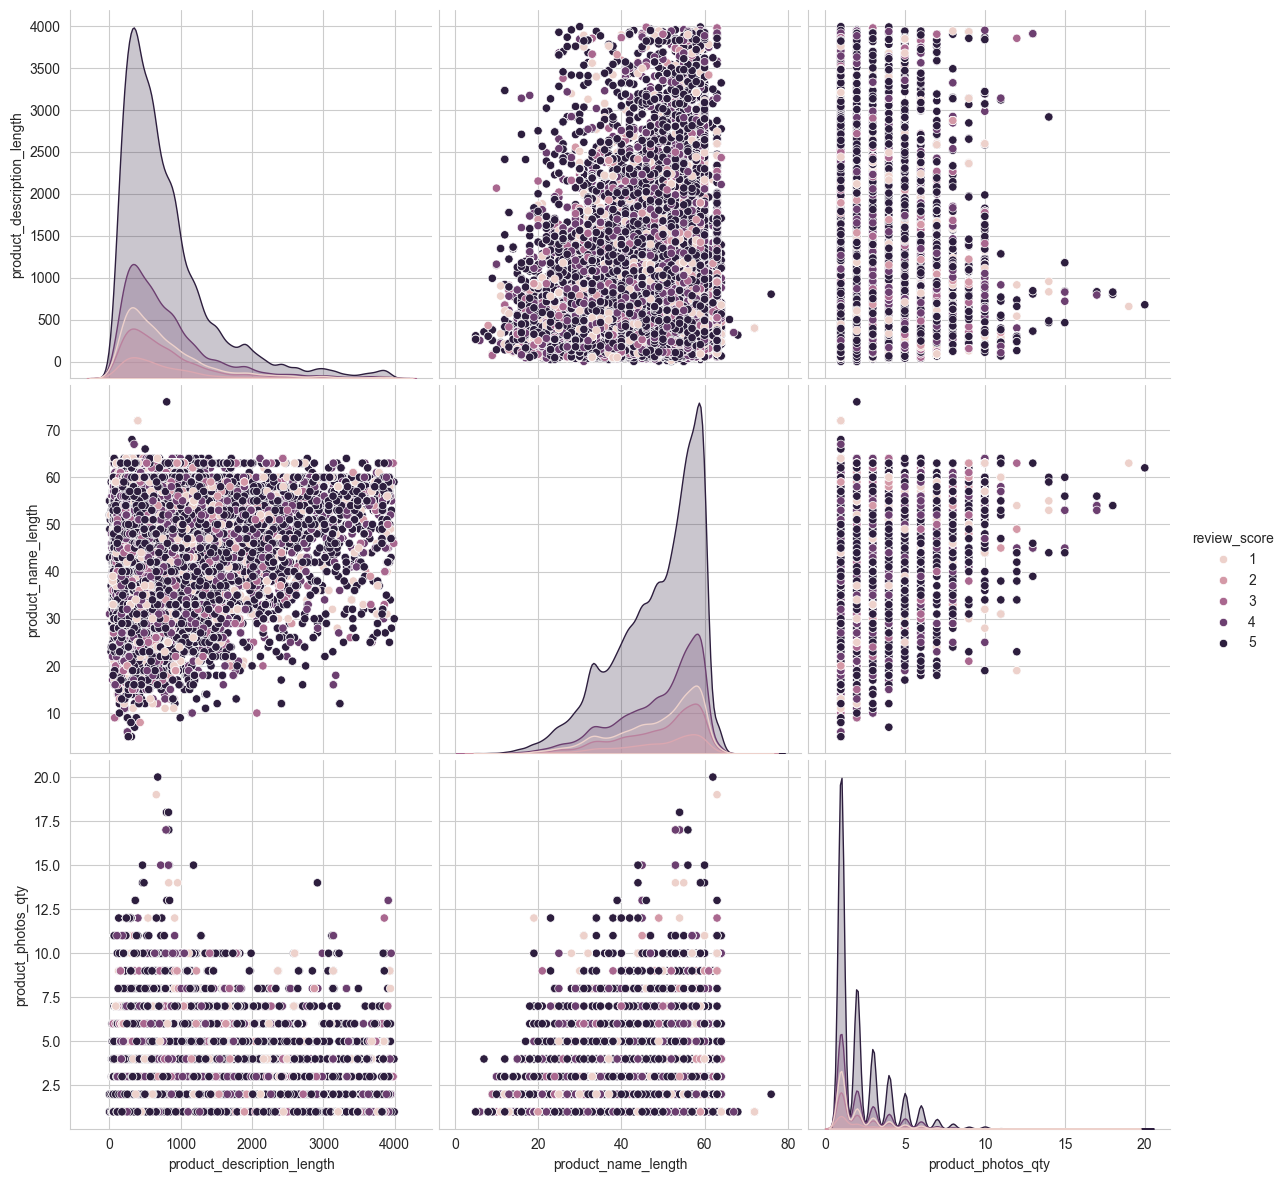

In [8]:
d = data[['product_description_length','product_name_length','product_photos_qty','review_score']]
sns.set_style("whitegrid");
sns.pairplot(d, hue="review_score", height=4);
plt.show()

**Observations**

1. Data is severly immbalaced, so scatter plot is able to separate the classes based on the selected feature
2. Point in the range (0-1500) product_description_length and product_name_length in range(30-60) have high frequency of 5 rated review.

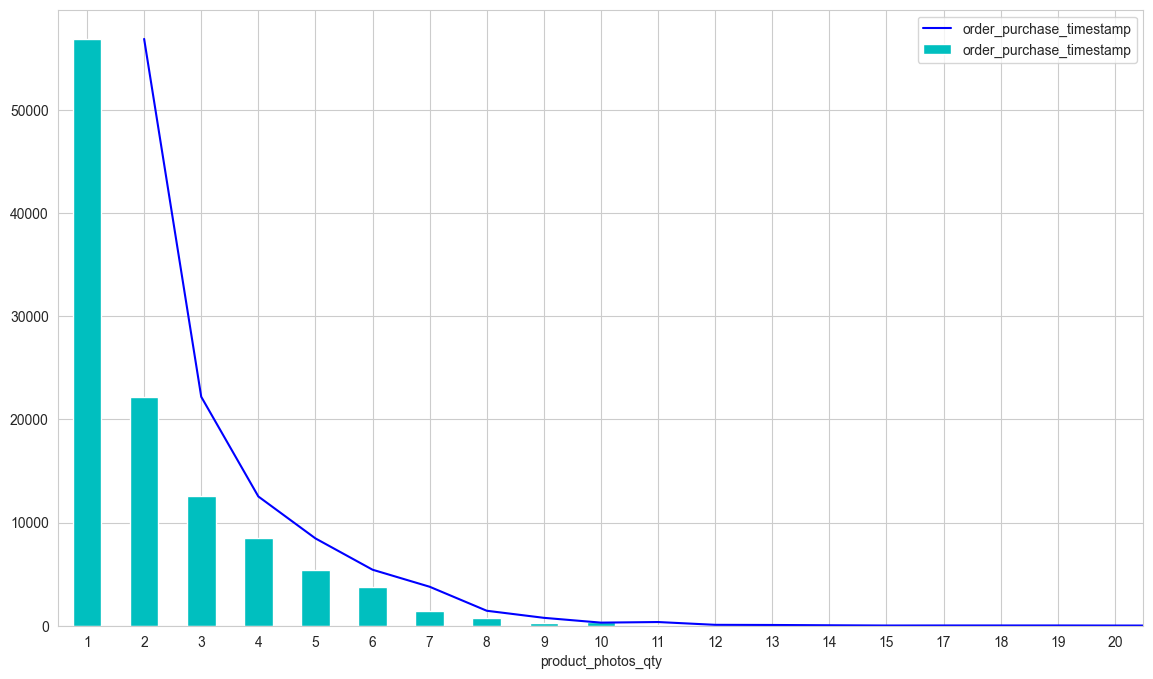

In [9]:
#plot showing relationship among number of photos and the count of number of orders
d = data.groupby(data['product_photos_qty'].astype(int))['order_purchase_timestamp'].count()
d.plot(kind='bar',figsize=(14,8),color='c')
d.plot(kind='line',figsize=(14,8),color='b')
plt.legend()
plt.show()

**Observations**

1. Density plots for the product name length shows that density around is very high around (40-60) range.
2. Number of orders w.r.t number of photos qty starts to decrease with increase in number of photos. This may be because of features like product_description length or name length.

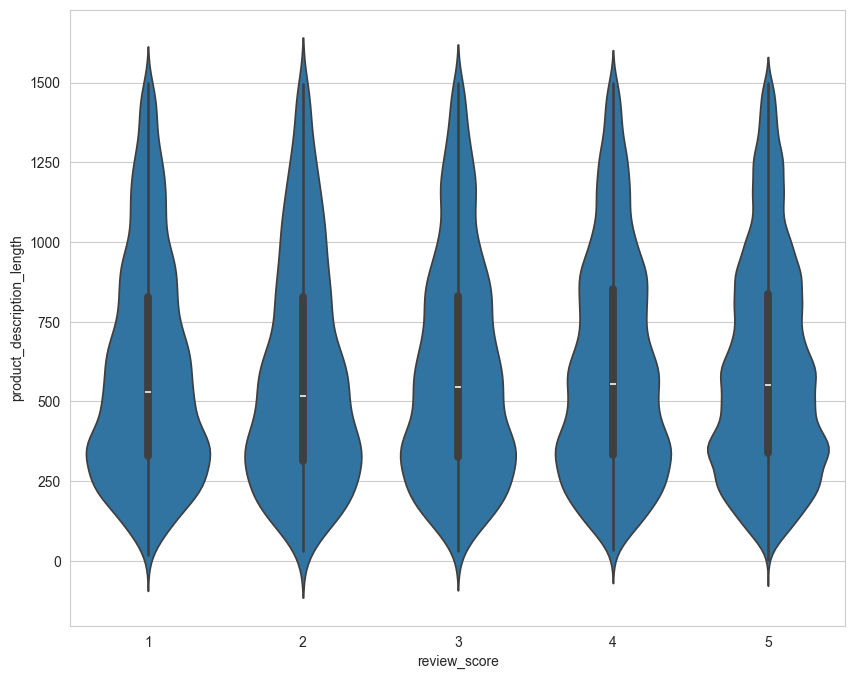

In [10]:
#taking only those points which was shown in the scatter plot
d = data[(data['product_name_length'] > 40) & (data['product_name_length'] < 60) & (data['product_description_length'] < 1500)]

plt.figure(figsize=(10,8))
#box plot
sns.violinplot(x='review_score',y='product_description_length', data=d)
plt.show()

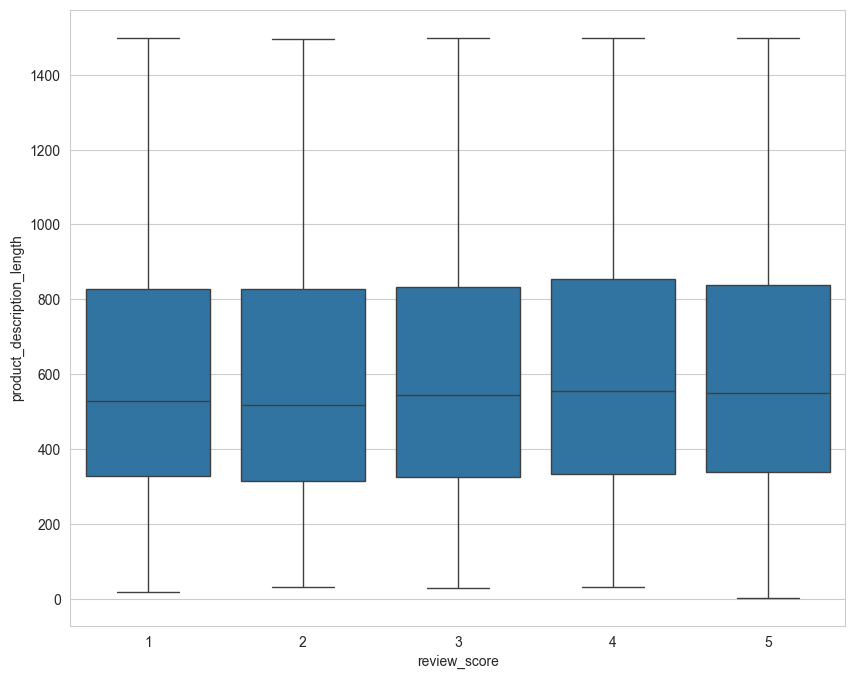

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(x='review_score',y='product_description_length', data=d)
plt.show()

**Observations-**

1. Even after taking the most favourable data to clearly separate them out, there is still no separation.

In [ ]:
#payments installments
#data.payment_installments.value_counts().plot(kind = 'bar',figsize=(10,8))
plt.figure(figsize=(10,8))
sns.countplot(data.payment_installments)
plt.show()